In [34]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from census import Census
from config import api_key
import scipy.stats as stats


In [35]:
# Store filepaths into variables
total_asset_loan_value_csv = Path("Resources/Total Loan Assets.csv")
average_rate_of_financed_loan_csv = Path("Resources/Average Loan Finance.csv")
average_amount_financed_csv= Path("Resources/Average Amount Financed.csv")
total_vehicle_sales_csv = Path("Resources/Total Vehicle Sales.csv")
total_population_csv = Path("Resources/Total Population USA.csv")


In [36]:
# Read the CSV files
total_asset_loan_value_df = pd.read_csv(total_asset_loan_value_csv)
average_rate_of_financed_loan_df = pd.read_csv(average_rate_of_financed_loan_csv)
average_amount_financed_df = pd.read_csv(average_amount_financed_csv)
total_vehicle_sales_df = pd.read_csv(total_vehicle_sales_csv)
total_population_df = pd.read_csv(total_population_csv)

In [37]:
#Dispay the data
total_asset_loan_value_df.head()

,DATE,QBPBSTASLNINDVOLNINDCARLN
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [38]:
#Rename Columns & Change to Float
total_asset_loan_value_df = total_asset_loan_value_df.rename(columns={"QBPBSTASLNINDVOLNINDCARLN": "Total Loan Amount"})
total_asset_loan_value_df.head()

,DATE,Total Loan Amount
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [39]:
total_asset_loan_value_df = pd.DataFrame(total_asset_loan_value_df)
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount"] * 1000000
total_asset_loan_value_df = total_asset_loan_value_df.dropna()
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount Millions"].astype('int64')
total_asset_loan_value_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions
0,2014-07-01,379531.304,379531304000
1,2014-10-01,385156.262,385156262000
2,2015-01-01,389633.848,389633848000
3,2015-04-01,397633.220,397633220000
4,2015-07-01,407873.676,407873676000


In [40]:
average_rate_of_financed_loan_df.head()

,DATE,RIELPCFANNM
0,2014-07-01,4.68
1,2014-10-01,4.82
2,2015-01-01,5.19
3,2015-04-01,5.38
4,2015-07-01,4.92


In [41]:
#Rename Columns and calculate on a quarterly rate in percentage format. 
average_rate_of_financed_loan_df = average_rate_of_financed_loan_df.rename(columns={"RIELPCFANNM": "Average Loan Rate"})
average_rate_of_financed_loan_df['Average Loan Rate'] = pd.to_numeric(average_rate_of_financed_loan_df['Average Loan Rate'], errors='coerce').fillna(0.0)
average_rate_of_financed_loan_df["Average Loan Rate % by Quatre"] = average_rate_of_financed_loan_df["Average Loan Rate"] / 100 * 3
average_rate_of_financed_loan_df.head()

,DATE,Average Loan Rate,Average Loan Rate % by Quatre
0,2014-07-01,4.68,0.1404
1,2014-10-01,4.82,0.1446
2,2015-01-01,5.19,0.1557
3,2015-04-01,5.38,0.1614
4,2015-07-01,4.92,0.1476


In [42]:
average_amount_financed_df=average_amount_financed_df.rename(columns={"DTCTLVENANM": "Average Financed Amount"})
average_amount_financed_df['Average Financed Amount'] = pd.to_numeric(average_amount_financed_df['Average Financed Amount'], errors='coerce').fillna(0.0)
average_amount_financed_df.head()

,DATE,Average Financed Amount
0,2014-07-01,26370.63
1,2014-10-01,26755.30
2,2015-01-01,27272.36
3,2015-04-01,26932.27
4,2015-07-01,27697.60


In [43]:
#Merge the dataframes 
revenue_rate_df = pd.merge(total_asset_loan_value_df, average_rate_of_financed_loan_df, on="DATE")
revenue_rate_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre
0,2014-07-01,379531.304,379531304000,4.68,0.1404
1,2014-10-01,385156.262,385156262000,4.82,0.1446
2,2015-01-01,389633.848,389633848000,5.19,0.1557
3,2015-04-01,397633.220,397633220000,5.38,0.1614
4,2015-07-01,407873.676,407873676000,4.92,0.1476


In [44]:
#Merge the dataframes
clean_df = pd.merge(revenue_rate_df, average_amount_financed_df, on="DATE")
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount
0,2014-07-01,379531.304,379531304000,4.68,0.1404,26370.63
1,2014-10-01,385156.262,385156262000,4.82,0.1446,26755.30
2,2015-01-01,389633.848,389633848000,5.19,0.1557,27272.36
3,2015-04-01,397633.220,397633220000,5.38,0.1614,26932.27
4,2015-07-01,407873.676,407873676000,4.92,0.1476,27697.60


In [45]:
# verify that our data is the correct type in order to be used in calculations
clean_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
Average Financed Amount          float64
dtype: object

In [46]:
#Calculate average amount financed by and multiply by the average rate of that period to give us new total of revenue generated during that quarter
clean_df["Average Loan Amount"] = clean_df["Average Financed Amount"] * clean_df["Average Loan Rate % by Quatre"] + clean_df["Average Financed Amount"]
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Average Loan Amount
0,2014-07-01,379531.304,379531304000,4.68,0.1404,26370.63,30073.066452
1,2014-10-01,385156.262,385156262000,4.82,0.1446,26755.30,30624.116380
2,2015-01-01,389633.848,389633848000,5.19,0.1557,27272.36,31518.666452
3,2015-04-01,397633.220,397633220000,5.38,0.1614,26932.27,31279.138378
4,2015-07-01,407873.676,407873676000,4.92,0.1476,27697.60,31785.765760


In [47]:
# Calculate the Total People getting loans by dividing Total Loan Amount (Millions) by our recaluclated amount for Revenue Generated  
clean_df["Total People Getting Loans"] = clean_df["Total Loan Amount Millions"] / clean_df["Average Loan Amount"]
clean_df["Total People Getting Loans"] = clean_df["Total People Getting Loans"].astype(int)
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Average Loan Amount,Total People Getting Loans
0,2014-07-01,379531.304,379531304000,4.68,0.1404,26370.63,30073.066452,12620306
1,2014-10-01,385156.262,385156262000,4.82,0.1446,26755.30,30624.116380,12576893
2,2015-01-01,389633.848,389633848000,5.19,0.1557,27272.36,31518.666452,12362002
3,2015-04-01,397633.220,397633220000,5.38,0.1614,26932.27,31279.138378,12712409
4,2015-07-01,407873.676,407873676000,4.92,0.1476,27697.60,31785.765760,12831960


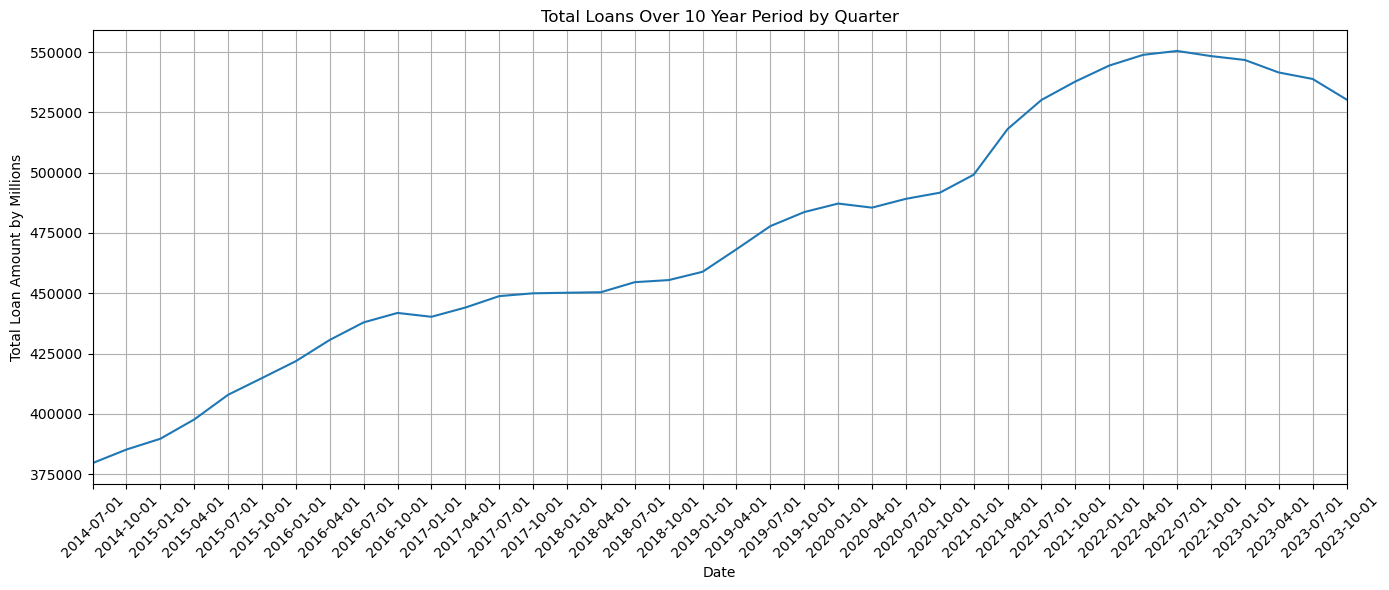

In [48]:
date = clean_df["DATE"]
Total_Loan_Amount = clean_df["Total Loan Amount"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Loan_Amount)
plt.title("Total Loans Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total Loan Amount by Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

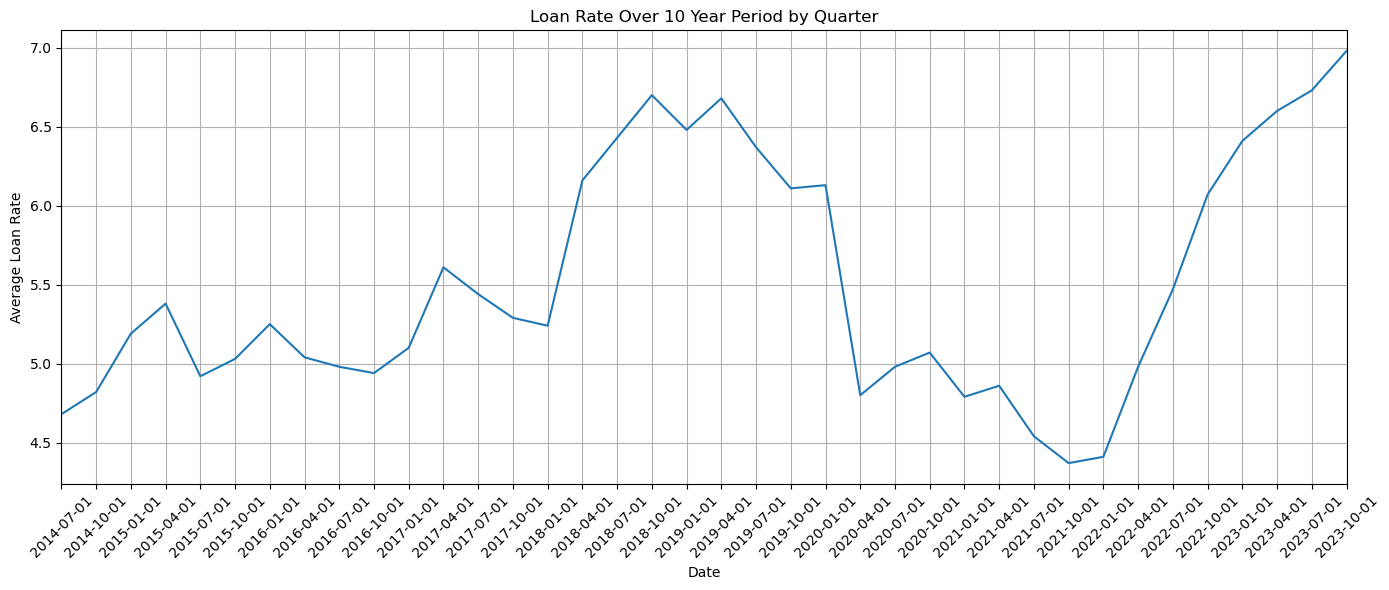

In [49]:
date = clean_df["DATE"]
Average_Loan_Rate = clean_df["Average Loan Rate"]
plt.figure(figsize=(14,6))
plt.plot(date, Average_Loan_Rate)
plt.title("Loan Rate Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Average Loan Rate")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

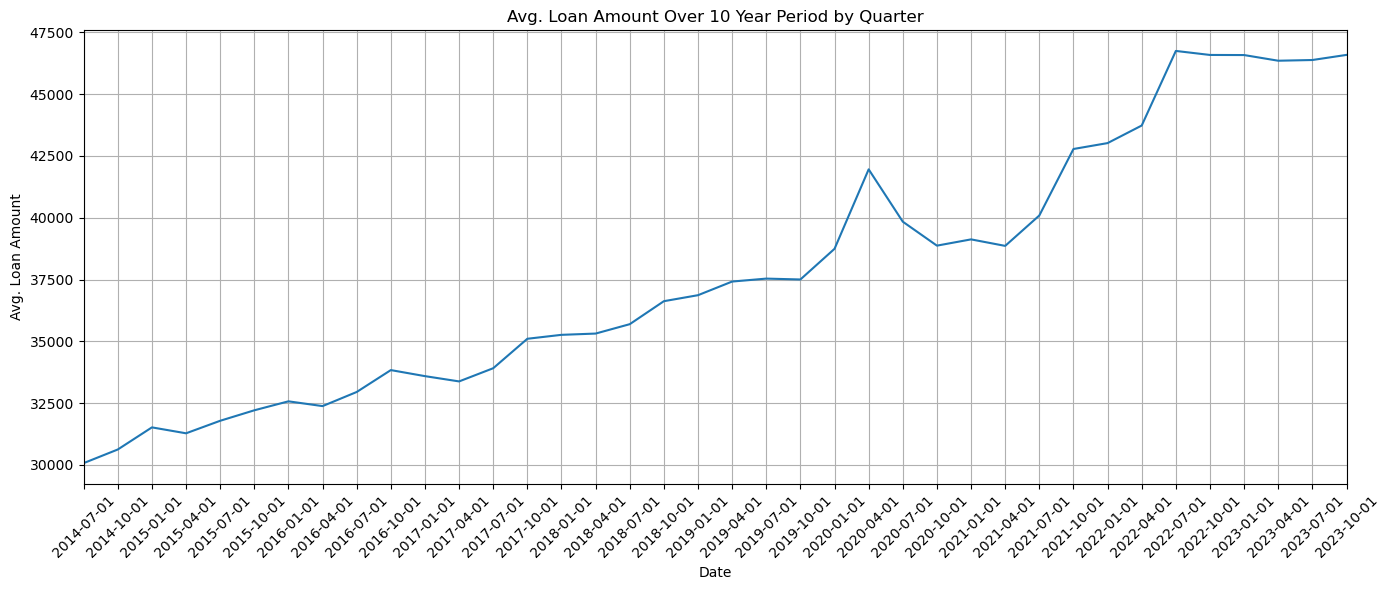

In [50]:
date = clean_df["DATE"]
Revenue_Generated = clean_df["Average Loan Amount"]
plt.figure(figsize=(14,6))
plt.plot(date, Revenue_Generated)
plt.title("Avg. Loan Amount Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Avg. Loan Amount")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

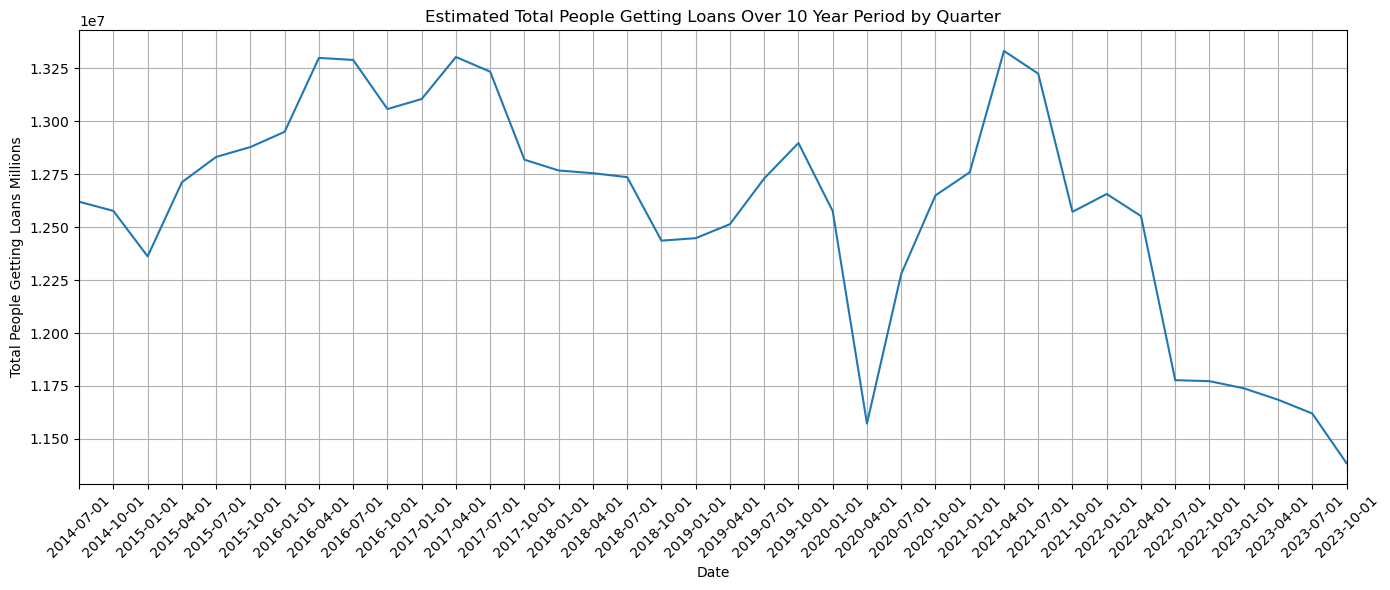

In [51]:
date = clean_df["DATE"]
Total_People = clean_df["Total People Getting Loans"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_People)
plt.title("Estimated Total People Getting Loans Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total People Getting Loans Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
#Display the data
total_vehicle_sales_df.head()

,DATE,TOTALSA
0,2014-07-01,51.475
1,2014-10-01,50.883
2,2015-01-01,51.697
3,2015-04-01,53.511
4,2015-07-01,54.990


In [53]:
#Rename Columns
total_vehicle_sales_df= total_vehicle_sales_df.rename(columns={"TOTALSA": "Total Vehicle Sales"})
total_vehicle_sales_df.head()

,DATE,Total Vehicle Sales
0,2014-07-01,51.475
1,2014-10-01,50.883
2,2015-01-01,51.697
3,2015-04-01,53.511
4,2015-07-01,54.990


In [54]:
#Convert to millions
total_vehicle_sales_df = pd.DataFrame(total_vehicle_sales_df)
total_vehicle_sales_df["Total Vehicle Sales Millions"] = total_vehicle_sales_df["Total Vehicle Sales"] * 1000000
total_vehicle_sales_df = total_vehicle_sales_df.dropna()
total_vehicle_sales_df["Total Vehicle Sales Millions"] = total_vehicle_sales_df["Total Vehicle Sales Millions"].astype(int)
total_vehicle_sales_df.head()

,DATE,Total Vehicle Sales,Total Vehicle Sales Millions
0,2014-07-01,51.475,51475000
1,2014-10-01,50.883,50883000
2,2015-01-01,51.697,51697000
3,2015-04-01,53.511,53511000
4,2015-07-01,54.990,54990000


In [55]:
total_population_df = total_population_df.rename(columns={"Year": "DATE"})
total_population_df.head()

,DATE,Population
0,2014-07-01,317758058
1,2014-10-01,318386329
2,2015-01-01,318387509
3,2015-04-01,318968455
4,2015-07-01,319549401


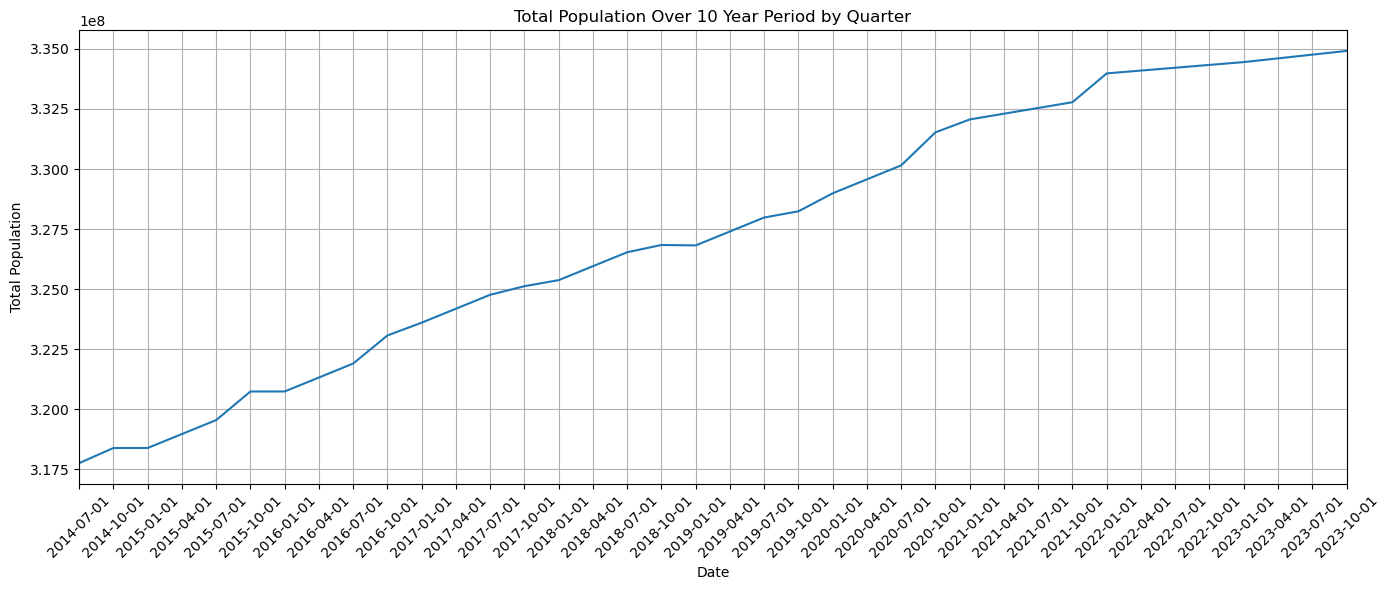

In [56]:
#Plot Total Population Over 10 Year Period by Quarter
date = total_population_df["DATE"]
Total_Population = total_population_df["Population"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Population)
plt.title("Total Population Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total Population")
plt.xlim(total_population_df["DATE"].min(),total_population_df["DATE"].max())
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
#Merge the dataframes
avg_car_per_person_df = pd.merge(total_population_df, total_vehicle_sales_df, on="DATE")
avg_car_per_person_df.head()

,DATE,Population,Total Vehicle Sales,Total Vehicle Sales Millions
0,2014-07-01,317758058,51.475,51475000
1,2014-10-01,318386329,50.883,50883000
2,2015-01-01,318387509,51.697,51697000
3,2015-04-01,318968455,53.511,53511000
4,2015-07-01,319549401,54.990,54990000


In [58]:
avg_car_per_person_df["Average Car Sales Per Person"] = avg_car_per_person_df["Total Vehicle Sales Millions"] / avg_car_per_person_df["Population"]
avg_car_per_person_df["Average Car Sales Per Person"] = avg_car_per_person_df["Average Car Sales Per Person"].astype(float)
avg_car_per_person_df.head()

,DATE,Population,Total Vehicle Sales,Total Vehicle Sales Millions,Average Car Sales Per Person
0,2014-07-01,317758058,51.475,51475000,0.161994
1,2014-10-01,318386329,50.883,50883000,0.159815
2,2015-01-01,318387509,51.697,51697000,0.162371
3,2015-04-01,318968455,53.511,53511000,0.167763
4,2015-07-01,319549401,54.990,54990000,0.172086


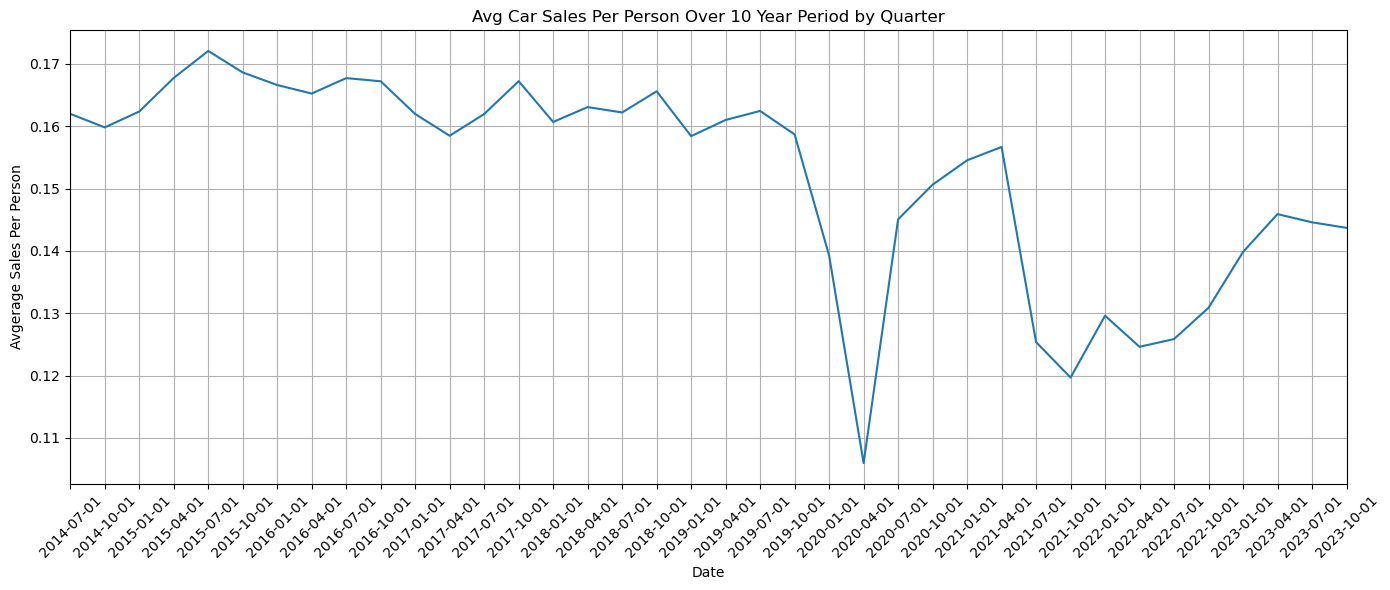

In [59]:
#Plot Avg Car sales per person Over 10 Year Period by Quarter
date = avg_car_per_person_df["DATE"]
Avgerage_Sales_Per_Person = avg_car_per_person_df["Average Car Sales Per Person"]
plt.figure(figsize=(14,6))
plt.plot(date, Avgerage_Sales_Per_Person)
plt.title("Avg Car Sales Per Person Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Avgerage Sales Per Person")
plt.xlim(avg_car_per_person_df["DATE"].min(),avg_car_per_person_df["DATE"].max())
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Initialize the Census object
url = f"https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=us:*&key={api_key}"
response = requests.get(url)

census_data = response.json()

print (census_data)

[['NAME', 'POP', 'us'], ['United States', '328239523', '1']]


In [61]:
specific_date_data = avg_car_per_person_df[avg_car_per_person_df['DATE'] == '2019-10-01']
print(specific_date_data)

          DATE  Population  Total Vehicle Sales  Total Vehicle Sales Millions  \
21  2019-10-01   328239523               52.089                      52089000   

    Average Car Sales Per Person  
21                      0.158692  


In [62]:
api_population = int(census_data[1][1])

specific_date_data = avg_car_per_person_df[avg_car_per_person_df['DATE'] == '2019-10-01']
date_population = specific_date_data['Population'].iloc[0]
print(f"Population from API: {api_population}")
print(f"Population from DataFrame: {date_population}")

Population from API: 328239523
Population from DataFrame: 328239523


In [63]:
url = "https://datausa.io/api/data?drilldowns=Nation&measures=Population"
data = requests.get(url).json()

years = []
population = []

for i in data['data']:
    years.append(i['Year'])
    population.append(i['Population'])

population_df = pd.DataFrame({"Year": years, "Population": population})

quarterly_years = []
quarterly_population = []

for i in range(1, len(population_df)):
    current_year = population_df.iloc[i]['Year']
    current_population = population_df.iloc[i]['Population']
    previous_population = population_df.iloc[i-1]['Population']
    
    
    yearly_increase = current_population - previous_population
    
    
    quarterly_increase = yearly_increase / 4
    

    for quarter in range(1, 5):

        population_at_quarter = previous_population + (quarterly_increase * quarter)
        quarterly_years.append(f"{current_year} Q{quarter}")
        quarterly_population.append(int(population_at_quarter))

quarterly_df = pd.DataFrame({"Year_Quarter": quarterly_years, "Population": quarterly_population})

quarterly_df


,Year_Quarter,Population
0,2021 Q1,330754565
1,2021 Q2,330411537
2,2021 Q3,330068509
3,2021 Q4,329725481
4,2020 Q1,328936437
5,2020 Q2,328147394
6,2020 Q3,327358351
7,2020 Q4,326569308
8,2019 Q1,326101429
9,2019 Q2,325633551


In [64]:
#Perform t-test

def perform_t_test(data1, data2, column):

    t_stat, p_value = stats.ttest_ind(data1[column].dropna(), data2[column].dropna())
    cohens_d = (np.mean(data1[column]) - np.mean(data2[column])) / np.sqrt((np.std(data1[column], ddof=1) ** 2 + np.std(data2[column], ddof=1) ** 2) / 2)
    
    result = {
        'column': column,
        't_statistic': t_stat,
        }
    return result

# Define pre-COVID and post-COVID periods
pre_covid = clean_df[clean_df['DATE'] < '2020-03-11']
post_covid = clean_df[clean_df['DATE'] >= '2020-03-11']

# List of columns to test
columns_to_test = ['Total Loan Amount', 'Average Loan Rate', 'Average Financed Amount', 
                   'Average Loan Amount', 'Total People Getting Loans']

for column in columns_to_test:

    result = perform_t_test(pre_covid, post_covid, column)
    print(f"Results for {column}:")
    print(f"T-statistic: {result['t_statistic']:.2f}")
    

Results for Total Loan Amount:
T-statistic: -9.49
Results for Average Loan Rate:
T-statistic: 0.63
Results for Average Financed Amount:
T-statistic: -12.34
Results for Average Loan Amount:
T-statistic: -9.71
Results for Total People Getting Loans:
T-statistic: 3.89


In [65]:
# End of file